# Loan Approval Prediction

#### İlayda Çelenk


The dataset can be found at Kaggle: https://www.kaggle.com/zaurbegiev/my-dataset#credit_train.csv

I will try to predict Loan Status of a given person. 

The document has seperate train and test data files and test data doesn't have the Loan Status column. Since train data has 100k columns, I will use it as the original data and ignore the test data file. 


### Outline:

#### 1. Importing the Libraries and the Dataset 
#### 2. Exploratory Data Analysis (EDA)
#### 3. Variable Analysis and Missing Values
#### 4. Encoding Categorical Data and Train/Test Split
#### 5. Correlation
#### 6. Models: Logistic Regression, Random Forest, KNN, SVM

## Importing the Libraries and the Dataset:

In [139]:
# for data manipulation
import pandas as pd
# for computations
import numpy as np
import sklearn
import math

# for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
import scikitplot as skplt

# to encode categorical data
from sklearn.preprocessing import LabelEncoder
# for n-1 binary columns
from sklearn.preprocessing import OneHotEncoder

# to create train/test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# import the class StandardScaler from the scikit preprocessing library
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import FactorAnalysis

# Principal Component Analysis to reduce dimension
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# Interpretation
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

In [140]:
data=pd.read_csv("credit_train.csv")

## Exploratory Data Analysis (EDA):

In [141]:
data.shape

(100514, 19)

In [142]:
data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


I will drop ID columns since they don't  contain useful information.

In [143]:
data.drop(['Loan ID'], axis=1, inplace=True)
data.drop(['Customer ID'], axis=1, inplace=True)

As a result, there are 16 indepent variables and the dependent variable is "Loan Status". The values of "Years in current job" column are in string format, therefore I will convert them into integer format. To do that, I will use the mapping.

In [144]:
data['Years in current job'] = data['Years in current job'].map({'< 1 year':0, '1 year':1,'2 years':2, '3 years':3, 
                                                                 '4 years':4,'5 years':5, '6 years':6, '7 years':7, 
                                                                 '8 years':8, '9 years':9, '10 years':10, 
                                                                 '10+ years':11 })


It is a binary classification problem, so I will do the following mapping.

In [145]:
data['Loan Status'] = data['Loan Status'].map({'Fully Paid':1, 'Charged Off':0 })

In [146]:
data.dtypes

Loan Status                     float64
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job            float64
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

## Variable Analysis and Missing Values:

In [147]:
data.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

### "Loan Status":

Since I want to predict "Loan Status", I will drop the rows with null values.

The proportion of two values may lead to high recall and the model may not be able to detect Charged Off. 


The worst case scenario – that the y_pred consists only ones – the accuracy will be 77.4%.


In [148]:
data=data.dropna(subset=["Loan Status"])

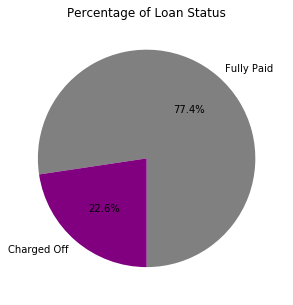

In [149]:
sizes = data['Loan Status'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
plt.pie(sizes, labels=["Fully Paid","Charged Off"], colors=colors,
        autopct='%1.1f%%',  pctdistance=0.6, shadow=False, startangle=270,)
plt.title('Percentage of Loan Status')
plt.show()

In [150]:
data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

Removing rows could cost valuable information. So I need to get more insight on the attributes to decide how to treat them.

In [151]:
data.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.000000,1.000000e+05,80846.000000,8.084600e+04,95778.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,0.773610,1.176045e+07,1076.456089,1.378277e+06,6.217284,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,0.418496,3.178394e+07,1475.403791,1.081360e+06,4.009124,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.796520e+05,705.000000,8.488440e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,1.000000,3.122460e+05,724.000000,1.174162e+06,6.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,1.000000,5.249420e+05,741.000000,1.650663e+06,11.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000,1.000000e+08,7510.000000,1.655574e+08,11.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### "Current Loan Amount":
Taking the logarithm does not make it more normal, but I believe it's better.

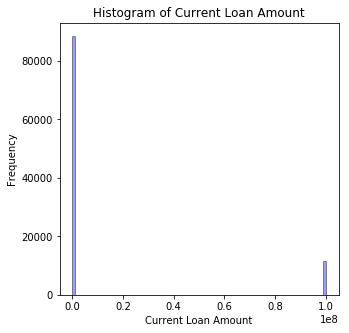

In [152]:
# seaborn histogram
sns.distplot(data["Current Loan Amount"], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Current Loan Amount')
plt.ylabel('Frequency')
plt.xlabel('Current Loan Amount')
plt.show()

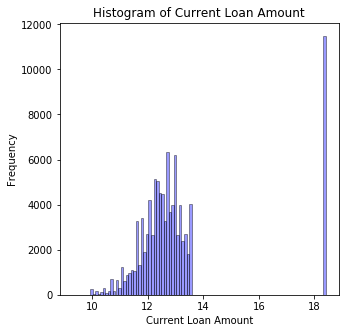

In [153]:
# seaborn histogram
sns.distplot(np.log(data["Current Loan Amount"]), hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Current Loan Amount')
plt.ylabel('Frequency')
plt.xlabel('Current Loan Amount')
plt.show()

In [154]:
data["Current Loan Amount"] = np.log(data["Current Loan Amount"])

### "Term":
From the chart, I believe that this attribute is important. 

I get the following insight: Short term loans have higher probability to get fully paid. It means that short term loans are less risky. 

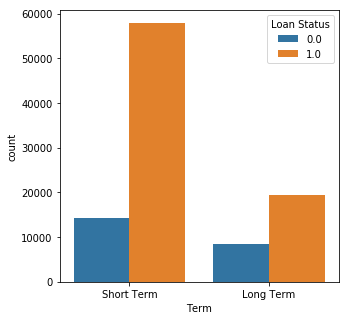

In [155]:
sns.countplot(x='Term', hue='Loan Status', data=data)
plt.show()

### Missing Values in "Credit Score":
I will replace the null values with the mean.

The common range for "Credit Score" is between 300 and 850, but the data has higher values. I believe the reason is human error, so the fourth digit should be removed.

In [156]:
data['Credit Score'] = np.where(data['Credit Score']>850, data['Credit Score']/10, data['Credit Score'])

In [157]:
data["Credit Score"].fillna( data["Credit Score"].mean() , inplace=True)

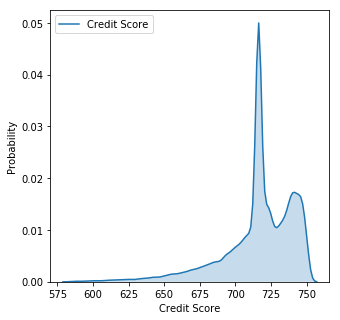

In [158]:
sns.kdeplot(data["Credit Score"], shade=True)
plt.ylabel('Probability')
plt.xlabel('Credit Score')
plt.show()

### Missing Values in "Annual Income":
To decide how to fill, let's see the distribution.

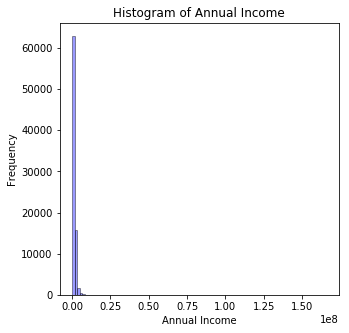

In [159]:
# seaborn histogram
sns.distplot(data["Annual Income"].dropna(), hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Annual Income')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.show()

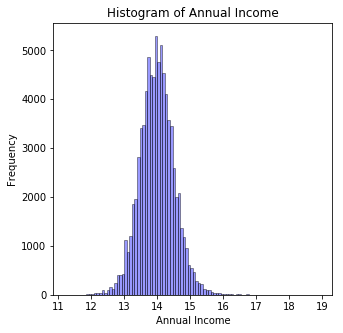

In [160]:
# seaborn histogram
sns.distplot(np.log(data["Annual Income"].dropna()), hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Annual Income')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.show()

/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


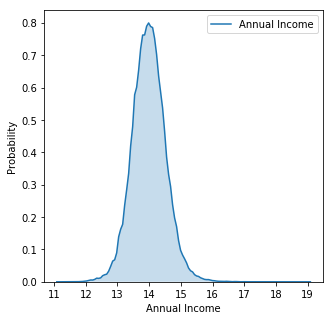

In [161]:
sns.kdeplot(np.log(data["Annual Income"]), shade=True)
plt.ylabel('Probability')
plt.xlabel('Annual Income')
plt.show()

Let's replace the null values with mean and plot it again.

In [162]:
data['Annual Income_mean'] = data['Annual Income']

In [163]:
data['Annual Income_mean'].fillna(data['Annual Income_mean'].mean(), inplace=True)

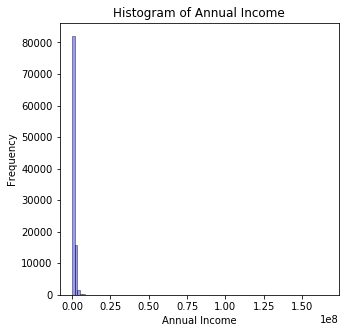

In [164]:
# seaborn histogram
sns.distplot(data["Annual Income_mean"], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Annual Income')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.show()

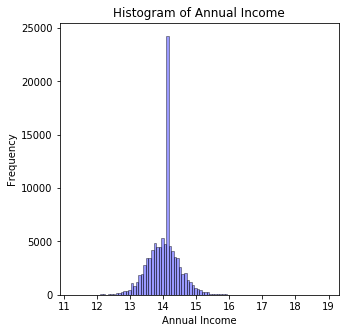

In [165]:
# seaborn histogram
sns.distplot(np.log(data["Annual Income_mean"]), hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Annual Income')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.show()

In [166]:
data.drop("Annual Income_mean", axis=1, inplace=True)

Replacing with the mean changed the distribution in a very bad way, so I will use another way. 

In order to keep the original distribution, I will replace the null values randomly from "Annual Income" column. Afterwards, I will check whether the mean and the standard deviation are changed or not. And then, I will take the logarithm of "Annual Income" column.

In [167]:
data['Annual Income'].interpolate(inplace=True)

In [168]:
data['Annual Income'].describe()

count    1.000000e+05
mean     1.379834e+06
std      1.087755e+06
min      7.662700e+04
25%      8.710740e+05
50%      1.198601e+06
75%      1.642132e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

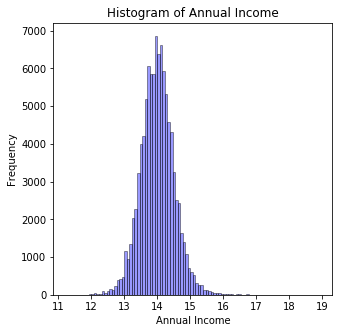

In [169]:
# seaborn histogram
sns.distplot(np.log(data["Annual Income"]), hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Annual Income')
plt.ylabel('Frequency')
plt.xlabel('Annual Income')
plt.show()

In [170]:
data["Annual Income"] = np.log(data["Annual Income"])

### Missing Values in "Years in current job": 

I will replace the null values here with the mode.

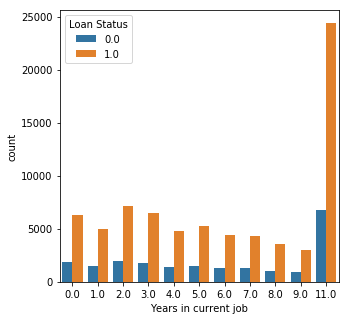

In [171]:
sns.countplot(hue='Loan Status', x='Years in current job', data=data,)
plt.show()

In [172]:
data["Years in current job"]=data["Years in current job"].fillna(data["Years in current job"].value_counts().idxmax())

### "Home Ownership":

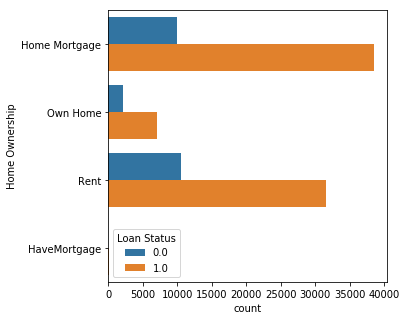

In [173]:
sns.countplot(y='Home Ownership', hue='Loan Status', data=data)
plt.show()

In [174]:
data["Home Ownership"]=data["Home Ownership"].replace(["HaveMortgage"], "Home Mortgage")

### "Purpose":
Here, I will combine "other" and "Other".

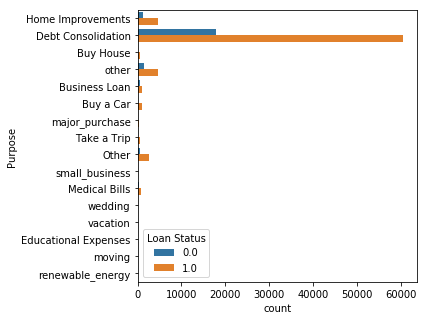

In [175]:
sns.countplot(y='Purpose', hue='Loan Status', data=data)
plt.show()

In [176]:
data["Purpose"]=data["Purpose"].replace(["other"], "Other")

### "Monthly Debt":

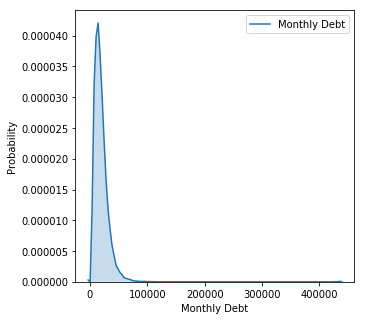

In [177]:
sns.kdeplot(data["Monthly Debt"], shade=True)
plt.ylabel('Probability')
plt.xlabel('Monthly Debt')
plt.show()

### "Years of Credit History":

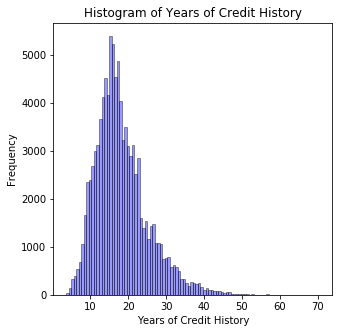

In [178]:
sns.distplot(data["Years of Credit History"], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Years of Credit History')
plt.ylabel('Frequency')
plt.xlabel('Years of Credit History')
plt.show()

### Missing Values in "Months since last delinquent":
Half of the values in "Months since last delinquent" are Null values. Removing rows means removing half of the data and I certainly don't want that. Therefore, I will remove the column, because it has no information in it.

In [179]:
data.drop('Months since last delinquent', axis=1, inplace=True)

### "Number of Open Accounts":

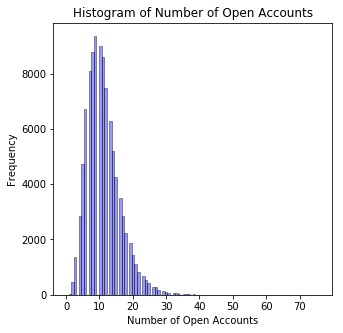

In [180]:
sns.distplot(data["Number of Open Accounts"], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Number of Open Accounts')
plt.ylabel('Frequency')
plt.xlabel('Number of Open Accounts')
plt.show()

### "Number of Credit Problems":

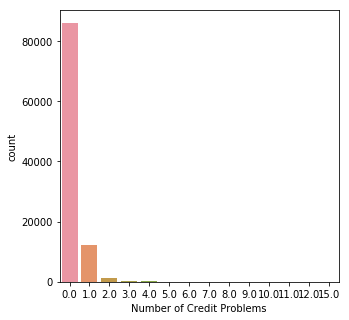

In [181]:
sns.countplot(x='Number of Credit Problems', data=data)
plt.show()

### "Current Credit Balance":

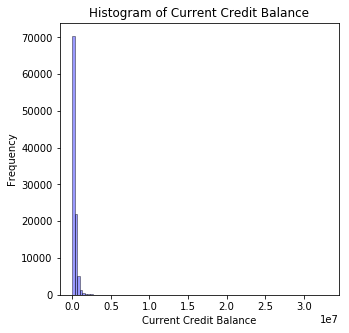

In [182]:
sns.distplot(data["Current Credit Balance"], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Current Credit Balance')
plt.ylabel('Frequency')
plt.xlabel('Current Credit Balance')
plt.show()

In [183]:
data["Current Credit Balance"].describe()

count    1.000000e+05
mean     2.946374e+05
std      3.761709e+05
min      0.000000e+00
25%      1.126700e+05
50%      2.098170e+05
75%      3.679588e+05
max      3.287897e+07
Name: Current Credit Balance, dtype: float64

### Missing Values in "Tax Liens":

There are only 10 null values in 'Tax Liens' column, so the missing values' percentage in this column is very small. Therefore, I will remove the rows.

In [184]:
data.drop(data[data['Tax Liens'].isnull()].index,inplace=True)


/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


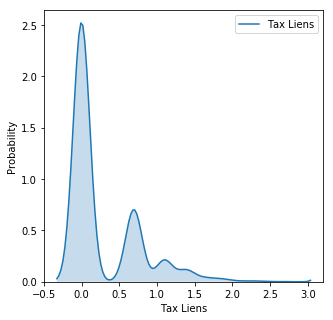

In [185]:
sns.kdeplot(np.log(data["Tax Liens"]), shade=True)
plt.ylabel('Probability')
plt.xlabel('Tax Liens')
plt.show()

### Missing Values in "Bankruptcies":
If a credit score does not exist then it must be zero. There are 204 null values to fill.

In [186]:
data["Bankruptcies"]=data["Bankruptcies"].fillna(0)

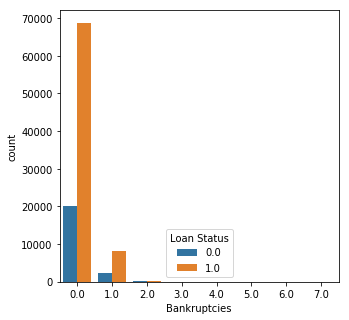

In [187]:
sns.countplot(x='Bankruptcies', hue='Loan Status', data=data)
plt.show()

### Missing Values in "Maximum Open Credit":

There are only 2 missing values in 'Maximum Open Credit' column, therefore I will remove the rows.

In [188]:
data.drop(data[data['Maximum Open Credit'].isnull()].index,inplace=True)

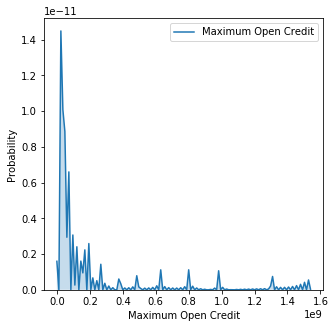

In [189]:
sns.kdeplot(data["Maximum Open Credit"], shade=True)
plt.ylabel('Probability')
plt.xlabel('Maximum Open Credit')
plt.show()

Let's check.

In [190]:
data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

## Correlation of the Numerical Features:

In [191]:
def num(df):
    result = df.copy()
    for column in result.columns:
        if result.dtypes[column] == np.object:
            result.drop(labels=column, axis=1)
    return result

In [194]:
data_num = num(data)
data_num = data_num.drop(labels="Loan Status", axis=1)

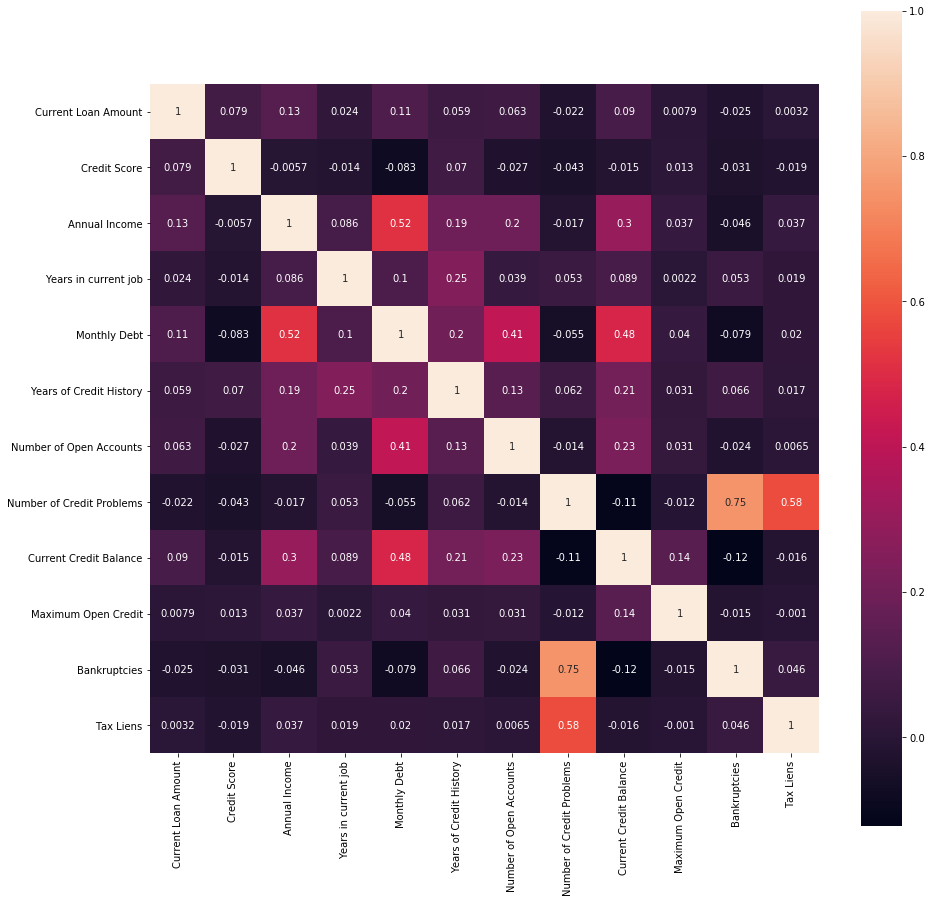

In [195]:
#Calculate the correlation
fig, axe = plt.subplots(figsize=(15,15))
sns.heatmap(data_num.corr(), annot=True, square=True)
plt.show()

## Encoding Categorical Data and Train/Test Split:

In [196]:
data = pd.get_dummies(data, drop_first=True)

In [197]:
y1 = data['Loan Status'].values
X1 = data.drop(labels='Loan Status', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state = 0)

In [198]:
sc_X=StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
X1_test = sc_X.transform(X1_test)

I will use the following function to visualize the confusion matrices.

In [199]:
def cm_fr(actual, pred):
    
    df = pd.DataFrame(
        confusion_matrix(actual, pred),
        index=["Charged Off", "Fully Paid"],
        columns=["Charged Off", "Fully Paid"]
    )
    df.index.names = ["Actual"]
    df.columns.names = ["Predicted"]
    
    cm = confusion_matrix(actual, pred)
    number = (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    
    df = df.mul(100).div(number)
    
    return df

In [200]:
def cm_data(actual, pred):
    df = pd.DataFrame(
        confusion_matrix(actual, pred),
        index=["Charged Off", "Fully Paid"],
        columns=["Charged Off", "Fully Paid"])
    df.index.names = ["Actual"]
    df.columns.names = ["Predicted"]
    
    return df

## Logistic Regression

In [201]:
lr = LogisticRegression(random_state = 0,solver = "liblinear")

In [202]:
lr.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
# Predicting the Test set results
y1_pred_lr = lr.predict(X1_test)
y1_train_lr =lr.predict(X1_train)

Here I will look at train and test confusion matrices and desire the proportions to be similar. This is important to see whether the model is generalizing or overfitting. The proportions are similar so there is generalization and no memorization or randomness.

In [204]:
print("TEST: \n", cm_data(y1_test, y1_pred_lr), "\n")
print(cm_fr(y1_test, y1_pred_lr), "\n")
print("TRAIN: \n", cm_data(y1_train, y1_train_lr), "\n")
print(cm_fr(y1_train, y1_train_lr), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off           33        4522
Fully Paid            37       15406 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off     0.165017   22.612261
Fully Paid      0.185019   77.037704 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off          121       17961
Fully Paid           147       61761 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off     0.151269   22.454057
Fully Paid      0.183773   77.210901 



The following scores are based on the confusion matrix.
The recall for the positive class is 1.00; this classifier captures a good part of the instances that belong to the negative class
BUT
the recall for the negative class is 0.01. This means that the classifier cannot find the negative values. 


In [205]:
print(classification_report(y1_test, y1_pred_lr))
print(classification_report(y1_train, y1_train_lr)) 

              precision    recall  f1-score   support

         0.0       0.47      0.01      0.01      4555
         1.0       0.77      1.00      0.87     15443

    accuracy                           0.77     19998
   macro avg       0.62      0.50      0.44     19998
weighted avg       0.70      0.77      0.68     19998

              precision    recall  f1-score   support

         0.0       0.45      0.01      0.01     18082
         1.0       0.77      1.00      0.87     61908

    accuracy                           0.77     79990
   macro avg       0.61      0.50      0.44     79990
weighted avg       0.70      0.77      0.68     79990



### Fixing the Class Imbalance in "Loan Status" :

The dataset is imbalanced, therefore I will use resampling methods(Undersampling & Oversampling) to deal with the uneven class distribution. 

Majority class: Fully Paid

Minority class: Charged Off

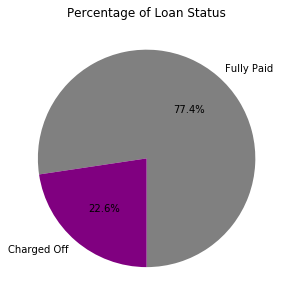

In [206]:
sizes = data['Loan Status'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
plt.pie(sizes, labels=["Fully Paid","Charged Off"], colors=colors,
        autopct='%1.1f%%',  pctdistance=0.6, shadow=False, startangle=270,)
plt.title('Percentage of Loan Status')
plt.show()

In [207]:
data["Loan Status"].value_counts()

1.0    77351
0.0    22637
Name: Loan Status, dtype: int64

In [208]:
#Undersampling:
shuffled_data = data.sample(frac=1,random_state=4)
fully_paid_data = shuffled_data.loc[shuffled_data['Loan Status'] == 1].sample(n=data.drop(data[ data['Loan Status'] == 1 ].index , inplace=False).shape[0],random_state=42)
charged_off_data = shuffled_data.loc[shuffled_data['Loan Status'] == 0]
under_data = pd.concat([fully_paid_data, charged_off_data])

In [209]:
fully_paid_data.shape

(22637, 30)

In [210]:
charged_off_data.shape

(22637, 30)

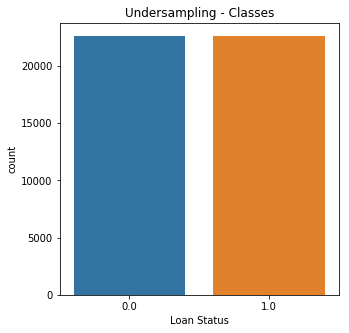

In [211]:
plt.figure(figsize=(5, 5))
sns.countplot('Loan Status', data=under_data)
plt.title('Undersampling - Classes')
plt.show()

In [223]:
y = under_data['Loan Status'].values

X = under_data.drop(labels='Loan Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

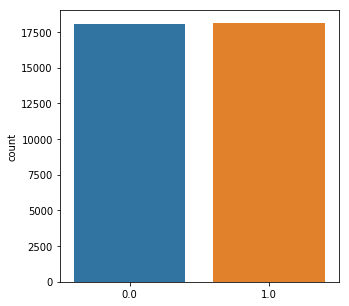

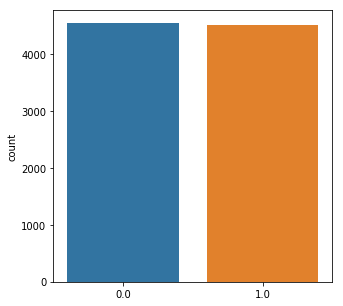

In [224]:
sns.countplot(x=y_train)
plt.show()
sns.countplot(x=y_test)
plt.show()

In [225]:
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [226]:
lr = LogisticRegression(random_state = 0,solver = "liblinear")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
# Predicting the Test set results
y_pred_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [228]:
print("TEST: \n", cm_data(y_test, y_pred_lr), "\n")
print(cm_fr(y_test, y_pred_lr), "\n")
print("TRAIN: \n", cm_data(y_train, y_train_lr), "\n")
print(cm_fr(y_train, y_train_lr), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         3025        1523
Fully Paid          2204        2303 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    33.406957   16.819437
Fully Paid     24.340144   25.433462 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        12132        5957
Fully Paid          8511        9619 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    33.496231   16.447169
Fully Paid     23.498716   26.557884 



In [229]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_train, y_train_lr)) 

              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62      4548
         1.0       0.60      0.51      0.55      4507

    accuracy                           0.59      9055
   macro avg       0.59      0.59      0.59      9055
weighted avg       0.59      0.59      0.59      9055

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     18089
         1.0       0.62      0.53      0.57     18130

    accuracy                           0.60     36219
   macro avg       0.60      0.60      0.60     36219
weighted avg       0.60      0.60      0.60     36219



Roc Curve measures how well a parameter can distinguish between two groups.
Looking at the recall scores, I don't expect Area Under Curve(auc) to be high.
Here it is 64% and this means that this model is not excellent at separating 0's and 1's.

/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


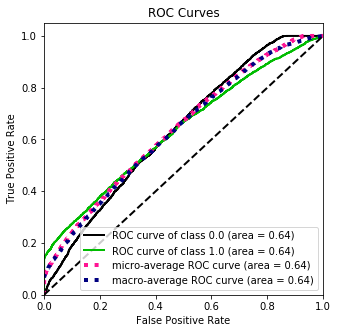

In [230]:
y_pred_proba = lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

### Important Features:

In [231]:
feature_results = pd.DataFrame({'feature': list(X1.columns), 
                                'importance': lr.coef_[0]})

In [232]:
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

In [233]:
feature_results.head(10)


,feature,importance
0,Current Loan Amount,0.724589
1,Term_Short Term,0.348991
2,Annual Income,0.181629
3,Purpose_Other,0.174821
4,Purpose_Debt Consolidation,0.160752
5,Maximum Open Credit,0.108660
6,Purpose_Buy a Car,0.104281
7,Purpose_Home Improvements,0.093108
8,Credit Score,0.071983
9,Purpose_Take a Trip,0.059514


In [234]:
most_important_features = feature_results['feature'][:10]

In [235]:
indices = [list(X.columns).index(x) for x in most_important_features]

In [236]:
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

In [237]:
lr = LogisticRegression()
lr.fit(X_train_reduced, y_train)
y_reduced_pred = lr.predict(X_test_reduced)
y_reduced_trainp = lr.predict(X_train_reduced)

/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [238]:
print(classification_report(y_test, y_reduced_pred))
print(classification_report(y_train, y_reduced_trainp)) 

              precision    recall  f1-score   support

         0.0       0.57      0.66      0.61      4548
         1.0       0.60      0.51      0.55      4507

    accuracy                           0.58      9055
   macro avg       0.59      0.58      0.58      9055
weighted avg       0.59      0.58      0.58      9055

              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62     18089
         1.0       0.61      0.52      0.56     18130

    accuracy                           0.59     36219
   macro avg       0.60      0.59      0.59     36219
weighted avg       0.60      0.59      0.59     36219



In [239]:
#Oversampling:
# SMOTE (Synthetic Minority Over-sampling Technique) is the most common technique
# It looks at the feature space for the minority class data points and considers its k nearest neighbours.
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.utils import resample

In [240]:
smt = SMOTE(random_state=0)
x1_smote, y1_smote = smt.fit_sample(X1_train, y1_train)

In [91]:
lr = LogisticRegression(random_state = 0,solver = "liblinear")
lr.fit(x1_smote, y1_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
# Predicting the Test set results
y1_spred_lr = lr.predict(X1_test)
y1_smote_lr = lr.predict(x1_smote)

In [93]:
print("TEST: \n", cm_data(y1_test, y1_spred_lr), "\n")
print(cm_fr(y1_test, y1_spred_lr), "\n")
print("TRAIN: \n", cm_data(y1_smote, y1_smote_lr), "\n")
print(cm_fr(y1_smote, y1_smote_lr), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         3062        1493
Fully Paid          7329        8114 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    15.311531    7.465747
Fully Paid     36.648665   40.574057 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        41711       20197
Fully Paid         29578       32330 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    33.687892   16.312108
Fully Paid     23.888674   26.111326 



In [94]:
print(classification_report(y1_test, y1_spred_lr))
print(classification_report(y1_smote, y1_smote_lr)) 

              precision    recall  f1-score   support

         0.0       0.29      0.67      0.41      4555
         1.0       0.84      0.53      0.65     15443

    accuracy                           0.56     19998
   macro avg       0.57      0.60      0.53     19998
weighted avg       0.72      0.56      0.59     19998

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     61908
         1.0       0.62      0.52      0.57     61908

    accuracy                           0.60    123816
   macro avg       0.60      0.60      0.60    123816
weighted avg       0.60      0.60      0.60    123816



## Random Forest:

In [125]:
rf = RandomForestClassifier(n_estimators = 37, criterion = 'gini', random_state = 0, max_depth=7)
rf.fit(x1_smote, y1_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
print("TEST: \n", cm_data(y1_test, y_pred_rf2), "\n")
print(cm_fr(y1_test, y_pred_rf2), "\n")
print("TRAIN: \n", cm_data(y1_smote, y_train_rf2), "\n")
print(cm_fr(y1_smote, y_train_rf2), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         3372        1183
Fully Paid          8064        7379 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    16.861686    5.915592
Fully Paid     40.324032   36.898690 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        51873       10035
Fully Paid         32344       29564 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    41.895232    8.104768
Fully Paid     26.122634   23.877366 



In [98]:
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_train, y_train_rf)) 

              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66      4548
         1.0       0.65      0.48      0.55      4507

    accuracy                           0.61      9055
   macro avg       0.62      0.61      0.60      9055
weighted avg       0.62      0.61      0.60      9055

              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68     18089
         1.0       0.68      0.51      0.59     18130

    accuracy                           0.64     36219
   macro avg       0.65      0.64      0.63     36219
weighted avg       0.65      0.64      0.63     36219



### Cross Validation

Cross Validation doesn't make a significant difference.

In [99]:
cross_val_score(estimator = rf, X = X, y = y, cv = 5)

array([0.62190813, 0.61605565, 0.61486636, 0.61552905, 0.62359178])

### Feature Elimination with PCA Method:

In [100]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [101]:
pca = decomposition.PCA(n_components=15) 
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [102]:
rf = RandomForestClassifier(n_estimators = 21, criterion = 'gini', random_state = 0, max_depth=7)
rf.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [103]:
y_pred_reduced_rf = rf.predict(X_test_reduced)
y_train_reduced_rf = rf.predict(X_train_reduced)

In [104]:
print(classification_report(y_test, y_pred_reduced_rf))
print(classification_report(y_train, y_train_reduced_rf)) 

              precision    recall  f1-score   support

         0.0       0.57      0.72      0.64      4548
         1.0       0.62      0.46      0.53      4507

    accuracy                           0.59      9055
   macro avg       0.60      0.59      0.58      9055
weighted avg       0.60      0.59      0.58      9055

              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68     18089
         1.0       0.68      0.51      0.58     18130

    accuracy                           0.63     36219
   macro avg       0.64      0.63      0.63     36219
weighted avg       0.64      0.63      0.63     36219



## Kth Nearest Neigbour:

In [105]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
y_pred_knn = classifier.predict(X_test)

In [107]:
y_train_knn = classifier.predict(X_train)

In [108]:
print("TEST: \n", cm_data(y_test, y_pred_knn), "\n")
print(cm_fr(y_test, y_pred_knn), "\n")
print("TRAIN: \n", cm_data(y_train, y_train_knn), "\n")
print(cm_fr(y_train, y_train_knn), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         2761        1787
Fully Paid          2047        2460 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    30.491441   19.734953
Fully Paid     22.606295   27.167311 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        13666        4423
Fully Paid          5278       12852 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    37.731577   12.211823
Fully Paid     14.572462   35.484138 



In [109]:
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_train, y_train_knn)) 

              precision    recall  f1-score   support

         0.0       0.57      0.61      0.59      4548
         1.0       0.58      0.55      0.56      4507

    accuracy                           0.58      9055
   macro avg       0.58      0.58      0.58      9055
weighted avg       0.58      0.58      0.58      9055

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     18089
         1.0       0.74      0.71      0.73     18130

    accuracy                           0.73     36219
   macro avg       0.73      0.73      0.73     36219
weighted avg       0.73      0.73      0.73     36219



## Support Vector Machine:

In [110]:
svm = svm.SVC(gamma='scale')

In [111]:
svm.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
y_pred_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [113]:
print("TEST: \n", cm_data(y_test, y_pred_svm), "\n")
print(cm_fr(y_test, y_pred_svm), "\n")
print("TRAIN: \n", cm_data(y_train, y_train_svm), "\n")
print(cm_fr(y_train, y_train_svm), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         3334        1214
Fully Paid          2354        2153 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    36.819437   13.406957
Fully Paid     25.996687   23.776919 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        13432        4657
Fully Paid          8771        9359 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    37.085508   12.857892
Fully Paid     24.216571   25.840029 



In [114]:
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_train, y_train_svm)) 

              precision    recall  f1-score   support

         0.0       0.59      0.73      0.65      4548
         1.0       0.64      0.48      0.55      4507

    accuracy                           0.61      9055
   macro avg       0.61      0.61      0.60      9055
weighted avg       0.61      0.61      0.60      9055

              precision    recall  f1-score   support

         0.0       0.60      0.74      0.67     18089
         1.0       0.67      0.52      0.58     18130

    accuracy                           0.63     36219
   macro avg       0.64      0.63      0.62     36219
weighted avg       0.64      0.63      0.62     36219



## Naive Bayes:

In [115]:
nb = GaussianNB() 
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
y_pred_nb = nb.predict(X_test)
y_train_nb = nb.predict(X_train)

In [117]:
print(classification_report(y_test, y_pred_nb))
print(classification_report(y_train, y_train_nb)) 

              precision    recall  f1-score   support

         0.0       0.54      0.95      0.69      4548
         1.0       0.79      0.20      0.32      4507

    accuracy                           0.57      9055
   macro avg       0.67      0.57      0.50      9055
weighted avg       0.67      0.57      0.51      9055

              precision    recall  f1-score   support

         0.0       0.55      0.95      0.69     18089
         1.0       0.80      0.21      0.34     18130

    accuracy                           0.58     36219
   macro avg       0.67      0.58      0.51     36219
weighted avg       0.67      0.58      0.51     36219



Here, the algorithm predicts most of the data as 0's and this creates a problem in recall score.

## Neural Network:

In [118]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [119]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [120]:
y_pred_nn = nn.predict(X_test)
y_train_nn = nn.predict(X_train)

In [121]:
print("TEST: \n", cm_data(y_test, y_pred_nn), "\n")
print(cm_fr(y_test, y_pred_nn), "\n")
print("TRAIN: \n", cm_data(y_train, y_train_nn), "\n")
print(cm_fr(y_train, y_train_nn), "\n")

TEST: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off         3569         979
Fully Paid          2749        1758 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    39.414688   10.811706
Fully Paid     30.358918   19.414688 

TRAIN: 
 Predicted    Charged Off  Fully Paid
Actual                              
Charged Off        14368        3721
Fully Paid         10692        7438 

Predicted    Charged Off  Fully Paid
Actual                              
Charged Off    39.669787   10.273613
Fully Paid     29.520417   20.536183 



In [122]:
print(classification_report(y_test, y_pred_nn))
print(classification_report(y_train, y_train_nn)) 

              precision    recall  f1-score   support

         0.0       0.56      0.78      0.66      4548
         1.0       0.64      0.39      0.49      4507

    accuracy                           0.59      9055
   macro avg       0.60      0.59      0.57      9055
weighted avg       0.60      0.59      0.57      9055

              precision    recall  f1-score   support

         0.0       0.57      0.79      0.67     18089
         1.0       0.67      0.41      0.51     18130

    accuracy                           0.60     36219
   macro avg       0.62      0.60      0.59     36219
weighted avg       0.62      0.60      0.59     36219



/Users/ilaydacelenk/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


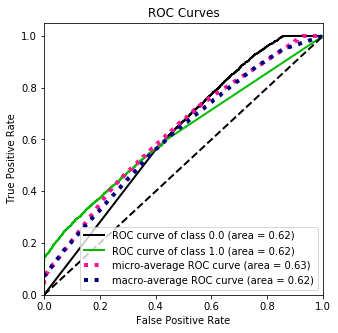

In [123]:
y_pred_proba2 = nn.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba2)
plt.show()

# Result

Even though I fixed the imbalanced data problem with undersampling method, I couldn't find a model that fullfills my expectations on prediction and recall. 

As a result, I believe Random Forest model is the best among these models, but still it's not a good model. SVM has also very similar results.

For the Random Forest model on the data after implementing Undersampling method:

Scores for test and train sets are similar, so I believe that the model is not overfitting. 

In this problem I try to find who to give loan. If I don't want to take risk I would prefer the model which has high recall and precision for 0s.
Recall for 1 is 48%, this is TP / (TP + FN), and it means that the classifier can only find 48% of the actual 1's.
On the other hand recall for 0 is 74%, this is TN / (TN + FP), and it means that the classifier find 74% of the actual 0's. 

Precision for 0 is 59%, this is TN / (TN + FN), and it means that only 59% of the predicted 0's are actually 0.

And also the ROC curve has a beter result with 64% area under curve.